## Why it's important to analyze factors impacting child birth weight?
In the last section, it's demonstrated that APGAR score (which is a direct measure of baby's vitals just after birth) is high for higher weighted babies. 

Since baby's health directly correlated with it's weight, analyzing factors impacting baby's weight is really important

#### Importing functions

In [116]:
import pandas as pd
import numpy as np
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
import random as random
import numpy.random as np_random
import time
import patsy
import sklearn.linear_model as linear
import random
sns.set(style="darkgrid")

#import matplotlib
#matplotlib.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)
%matplotlib inline

#### Loading first dataset

In [118]:
data = pd.read_csv( "natl2015.csv")
# data.head(5)

Loading second dataset and used 2012 data since it was most recent

In [119]:
data2 = pd.read_csv( "NCHS_Births__Birth_Rates__and_Fertility_Rates__by_Race_of_Mother__United_States__1960-2013.csv")
data2_2012 = data2[data2['Year']==2012]

### Body Weight of Child

I used column 'dbwt' which child birth weight in grams

https://www.icpsr.umich.edu/icpsrweb/ICPSR/ssvd/studies/36461/datasets/0001/variables/DBWT?geography%5B0%5D=American+Samoa&paging.startRow=24351
    
Missing Data: 9999 ---->Not stated birth weight (as mentioned in above link)
 

In [120]:
data_wt = data[data['dbwt']!=9999]
birth_wt = data_wt['dbwt']

# Graph #1: Weight Distribution of child's birth weight (in grams)

### Historgram of child birth weight distribution (in grams)


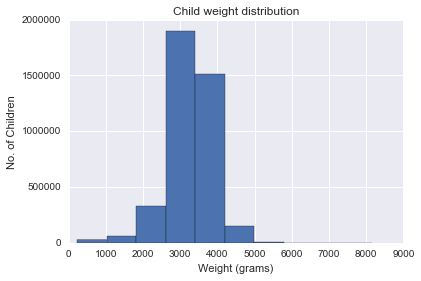

In [121]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(data_wt['dbwt'])
plt.title('Child weight distribution')
plt.xlabel('Weight (grams)')
plt.ylabel('No. of Children')
plt.show()

https://wonder.cdc.gov/wonder/help/natality.html

## Exploring impact of cigarettes on child birth weight

https://www.icpsr.umich.edu/icpsrweb/ICPSR/ssvd/variables?geography%5B0%5D=American+Samoa&paging.startRow=24251

### Effect of cigarette smoking on mean weight 
#### Data collected for cigarettes smoked for all three trimesters

In [122]:
grouped = data_wt.groupby( "cig1_r")
child_weight = grouped[ "dbwt"].describe()
child_weight = child_weight.unstack( level=-1)
print child_weight

            count         mean         std    min      25%     50%     75%     max
cig1_r                                                                            
0.0     3587649.0  3285.744221  587.469710  227.0  2990.00  3320.0  3650.0  8165.0
1.0       96851.0  3122.968271  609.770679  227.0  2809.00  3175.0  3505.0  7825.0
2.0      116000.0  3083.419724  599.492376  227.0  2778.00  3120.0  3459.0  8043.0
3.0       71528.0  3049.848731  597.438021  227.0  2737.00  3090.0  3430.0  7885.0
4.0        6437.0  3016.489669  602.855921  241.0  2691.00  3059.0  3402.0  5627.0
5.0        1312.0  3036.112805  616.880980  515.0  2718.75  3093.5  3440.0  4876.0
6.0       36270.0  3197.871519  658.905363  227.0  2892.00  3260.0  3600.0  6974.0


In [123]:
grouped = data_wt.groupby( "cig2_r")
child_weight = grouped[ "dbwt"].describe()
child_weight = child_weight.unstack( level=-1)
print child_weight

            count         mean         std    min     25%     50%     75%     max
cig2_r                                                                           
0.0     3630481.0  3285.159440  587.861539  227.0  2988.0  3320.0  3650.0  8165.0
1.0       95061.0  3089.591273  604.592001  227.0  2778.0  3140.0  3461.0  7825.0
2.0      106613.0  3056.519074  587.931343  227.0  2750.0  3095.0  3430.0  8043.0
3.0       43374.0  3015.144234  596.013652  235.0  2700.0  3062.0  3396.0  7885.0
4.0        3101.0  2980.524347  618.901551  312.0  2655.0  3015.0  3371.0  7314.0
5.0         888.0  3034.943694  604.416003  308.0  2722.0  3081.0  3430.0  4621.0
6.0       36529.0  3197.005858  659.684927  227.0  2892.0  3260.0  3600.0  6974.0


In [124]:
grouped = data_wt.groupby( "cig3_r")
child_weight = grouped[ "dbwt"].describe()
child_weight = child_weight.unstack( level=-1)
print child_weight

            count         mean         std    min      25%     50%      75%     max
cig3_r                                                                             
0.0     3642917.0  3284.241694  589.082029  227.0  2985.00  3317.0  3650.00  8165.0
1.0      104688.0  3089.702793  579.885149  227.0  2778.00  3125.0  3459.00  6810.0
2.0       92962.0  3053.109690  575.355039  227.0  2750.00  3090.0  3415.75  8043.0
3.0       35664.0  3019.629066  591.384258  235.0  2710.00  3062.0  3393.25  7885.0
4.0        2519.0  2998.012306  605.822646  312.0  2673.50  3030.0  3373.00  7314.0
5.0         828.0  3030.681159  654.129661  308.0  2708.75  3090.0  3440.25  4590.0
6.0       36469.0  3195.092380  663.952756  227.0  2892.00  3260.0  3600.00  6974.0


#### Vizualizing impact of smoking during first trimester

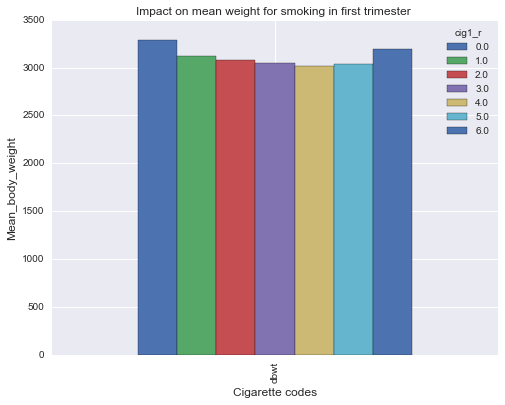

In [125]:
df1 = data_wt[['cig1_r','dbwt']]
grp_mean=df1.groupby('cig1_r').mean()
grp_mean_transpose = grp_mean.transpose()
grp_mean_transpose.head()
import matplotlib.pyplot as plt
ax = grp_mean_transpose.plot(kind='bar',grid = True , title ="Impact on mean weight for smoking in first trimester ", figsize=(8, 6), width = .8,legend=True, fontsize=10)
ax.set_xlabel("Cigarette codes", fontsize=12)
ax.set_ylabel("Mean_body_weight", fontsize=12)
plt.show()

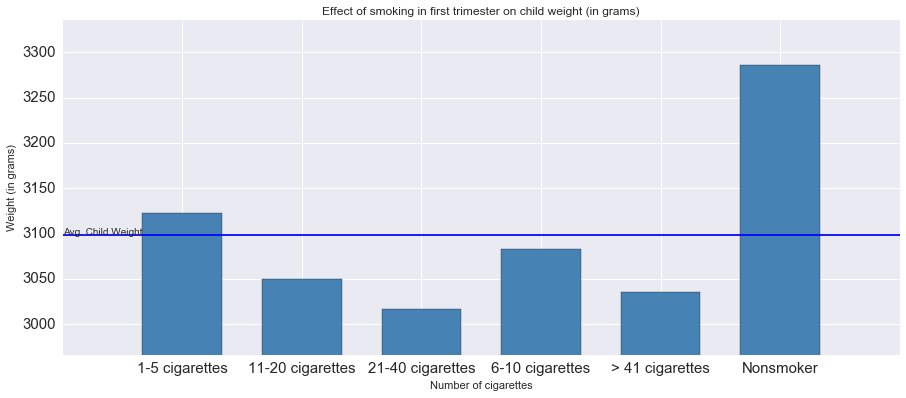

In [156]:
grp_mean = {"Nonsmoker":3285.74, "1-5 cigarettes":3122.96, "6-10 cigarettes":3083.41, "11-20 cigarettes":3049.84, 
            "21-40 cigarettes": 3016.48, "> 41 cigarettes":3036.11}

xs=[]
ys=[]
x=range(len(grp_mean))
for key,value in sorted(grp_mean.iteritems()): 
  xs.append(key)    
  ys.append(value)
    
mean_wt= np.mean(ys)

width = 1/1.5
figure = plt.figure(figsize=(15, 6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(x, ys, width, color="steelblue", align="center")
axes.set_xticks([i for i in xrange(0, len(grp_mean))])
axes.set_xticklabels(xs)
plt.tick_params(which='major', labelsize=15)
# tick.label.set_fontsize(14)
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((min(ys)-50, max(ys)+50))
axes.axhline(y=mean_wt, xmin=0, label="Avg. Child Weight")
plt.text(x=-1, y=mean_wt, s="Avg. Child Weight")
axes.set_title('Effect of smoking in first trimester on child weight (in grams)')

axes.set_xlabel('Number of cigarettes')
axes.set_ylabel('Weight (in grams)')
plt.show()

# Graph#2 : What is the impact of smoking on child's weight?
Answer: Smokers have lower average child birth weight

### Difference in weight of smokers and non smokers


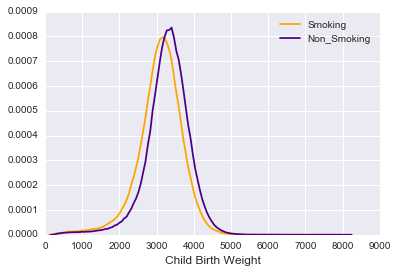

In [127]:
smoking = data_wt['dbwt'][data_wt['cig_rec']=='Y']
non_smoking = data_wt['dbwt'][data_wt['cig_rec']=='N']

sns.distplot(smoking, bins= 15, color = 'orange',hist=False, label= 'Smoking')
sns.distplot(non_smoking, bins = 15, color = 'indigo', hist=False, label= 'Non_Smoking')
plt.xlabel('Child Birth Weight', fontsize=12)

## Prenatal visits

In [128]:
grouped = data.groupby( "precare5")
child_weight = grouped[ "dbwt"].describe()
child_weight = child_weight.unstack( level=-1)
print child_weight

              count         mean         std    min     25%     50%     75%     max
precare5                                                                           
1.0       2913698.0  3292.276005  612.876617  227.0  2990.0  3320.0  3657.0  9999.0
2.0        645166.0  3246.597733  599.688842  227.0  2948.0  3280.0  3600.0  9999.0
3.0        169276.0  3275.112544  531.179654  296.0  2968.0  3285.0  3600.0  9999.0
4.0         59704.0  3022.367999  886.957847  227.0  2680.0  3105.0  3464.0  9999.0
5.0        131824.0  3184.865017  903.045949  227.0  2845.0  3232.0  3575.0  9999.0


# Graph#3  : Are pre-natal visits important? What is the ideal start period for pre-natal visits?
### Observation: code-4 means no pre-natal care which results in lower child birth weight as shown below, earlier we can start higher are the chances of increased birth weight

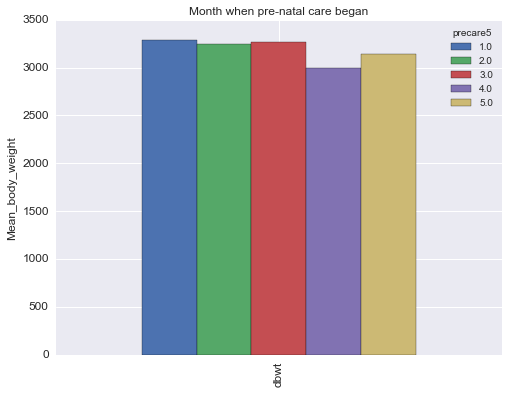

In [129]:
df1 = data_wt[['precare5','dbwt']]
grp_mean=df1.groupby('precare5').mean()
grp_mean_transpose = grp_mean.transpose()
grp_mean_transpose.head()
import matplotlib.pyplot as plt
ax = grp_mean_transpose.plot(kind='bar', title ="Month when pre-natal care began", figsize=(8, 6), width = .8,legend=True, fontsize=12)
ax.set_ylabel("Mean_body_weight", fontsize=12)
plt.show()

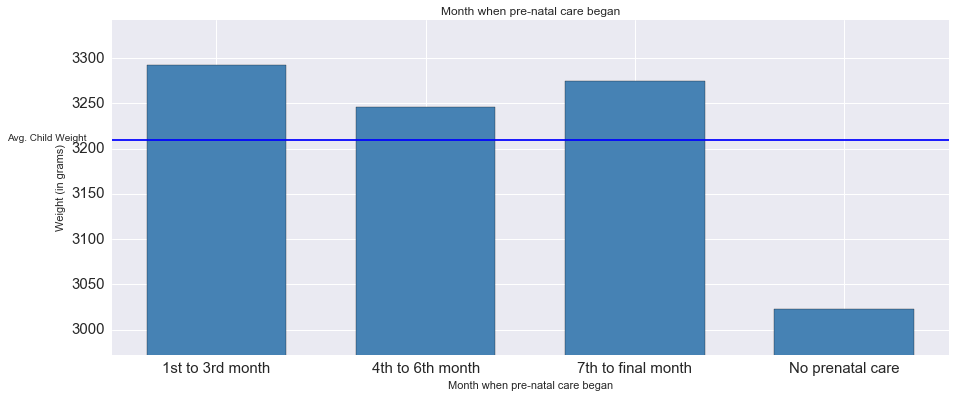

In [130]:
grp_mean = {"1st to 3rd month":3292.27, "4th to 6th month":3246.59, "7th to final month":3275.11, 
            "No prenatal care":3022.36}

xs=[]
ys=[]
x=range(len(grp_mean))
for key,value in grp_mean.iteritems(): 
  xs.append(key)    
  ys.append(value)
    
mean_wt= np.mean(ys)

width = 1/1.5
figure = plt.figure(figsize=(15, 6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(x, ys, width, color="steelblue", align="center")
axes.set_xticks([i for i in xrange(0, len(grp_mean))])
axes.set_xticklabels(xs)
plt.tick_params(which='major', labelsize=15)
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((min(ys)-50, max(ys)+50))
axes.axhline(y=mean_wt, xmin=0, label="Avg. Child Weight")
plt.text(x=-1, y=mean_wt, s="Avg. Child Weight")
axes.set_title('Month when pre-natal care began')

axes.set_xlabel('Month when pre-natal care began')
axes.set_ylabel('Weight (in grams)')
plt.show()

## Effect of Diseases

### Gonorrhea


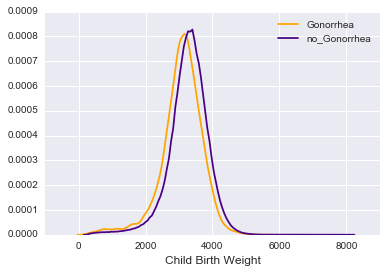

In [131]:
Gonorrhea = data_wt['dbwt'][data_wt['ip_gon']=='Y']
no_Gonorrhea = data_wt['dbwt'][data_wt['ip_gon']=='N']
sns.distplot(Gonorrhea, bins= 15, color = 'orange',hist=False, label= 'Gonorrhea')
sns.distplot(no_Gonorrhea, bins = 15, color = 'indigo', hist=False, label= 'no_Gonorrhea')
plt.xlabel('Child Birth Weight', fontsize=12)

### Pre_pregnancy_Diabetes


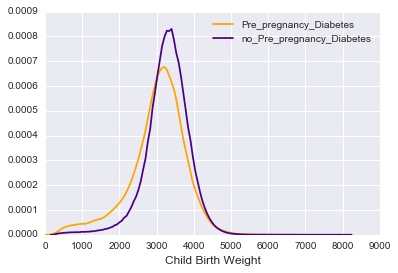

In [132]:
Pre_pregnancy_Diabetes = data_wt['dbwt'][data_wt['rf_phype']=='Y']
no_Pre_pregnancy_Diabetes = data_wt['dbwt'][data_wt['rf_phype']=='N']
sns.distplot(Pre_pregnancy_Diabetes, bins= 15, color = 'orange',hist=False, label= 'Pre_pregnancy_Diabetes')
sns.distplot(no_Pre_pregnancy_Diabetes, bins = 15, color = 'indigo', hist=False, label= 'no_Pre_pregnancy_Diabetes')
plt.xlabel('Child Birth Weight', fontsize=12)

#### Gestational Diabetes also have no impact on child birth weight

### Gestational_Hypertension

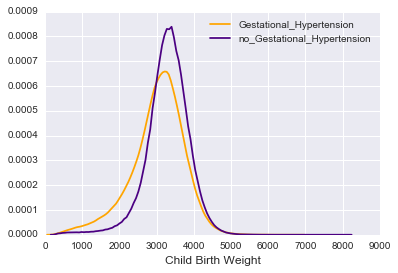

In [133]:
Gestational_Hypertension  = data_wt['dbwt'][data_wt['rf_ghype']=='Y']
no_Gestational_Hypertension  = data_wt['dbwt'][data_wt['rf_ghype']=='N']
sns.distplot(Gestational_Hypertension, bins= 15, color = 'orange',hist=False, label= 'Gestational_Hypertension')
sns.distplot(no_Gestational_Hypertension, bins = 15, color = 'indigo', hist=False, label= 'no_Gestational_Hypertension')
plt.xlabel('Child Birth Weight', fontsize=12)

#### Similarly pre_pregnancy & eclampsia hypertension causes lower child body weight

# Graph#4: What is effect of previous preterm birth on next child?
Answer: Previous pre-term birth will have high chances of next child having low birth weight

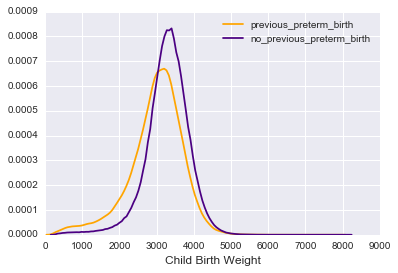

In [134]:
previous_preterm_birth  = data_wt['dbwt'][data_wt['rf_ppterm']=='Y']
no_previous_preterm_birth = data_wt['dbwt'][data_wt['rf_ppterm']=='N']
sns.distplot(previous_preterm_birth, bins= 15, color = 'orange',hist=False, label= 'previous_preterm_birth')
sns.distplot(no_previous_preterm_birth, bins = 15, color = 'indigo', hist=False, label= 'no_previous_preterm_birth')
plt.xlabel('Child Birth Weight', fontsize=12)

### Syphilis

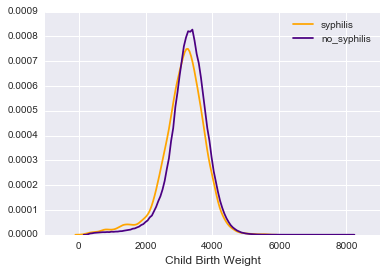

In [135]:
syphilis  = data_wt['dbwt'][data_wt['ip_syph']=='Y']
no_syphilis = data_wt['dbwt'][data_wt['ip_syph']=='N']
sns.distplot(syphilis, bins= 15, color = 'orange',hist=False, label= 'syphilis')
sns.distplot(no_syphilis, bins = 15, color = 'indigo', hist=False, label= 'no_syphilis')
plt.xlabel('Child Birth Weight', fontsize=12)

### Effect on Hepatitis on child weight (makes it important to take hepatitis vaccine)
### Mothers with prior hepatitis B or C will higher chances of lower child birth weight

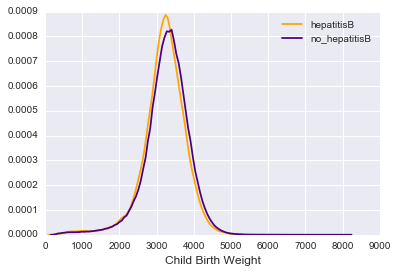

In [136]:
hepatitisB  = data_wt['dbwt'][data_wt['ip_hepatb']=='Y']
no_hepatitisB = data_wt['dbwt'][data_wt['ip_hepatb']=='N']
sns.distplot(hepatitisB, bins= 15, color = 'orange',hist=False, label= 'hepatitisB')
sns.distplot(no_hepatitisB, bins = 15, color = 'indigo', hist=False, label= 'no_hepatitisB')
plt.xlabel('Child Birth Weight', fontsize=12)

#### Similar results on child body weight on hepatitis c

## Effect of steroids

In [137]:
grouped = data.groupby( "ld_ster")
curb_weight = grouped[ "dbwt"].describe()
curb_weight = curb_weight.unstack( level=-1)
print curb_weight

             count         mean          std    min     25%     50%     75%     max
ld_ster                                                                            
N        3852142.0  3296.653644   598.157366  227.0  2985.0  3317.0  3640.0  9999.0
U           1814.0  3650.503859  1978.449299  227.0  2863.0  3310.5  3714.0  9999.0
Y          65712.0  2072.369826   893.765598  227.0  1448.0  2013.0  2637.0  9999.0


# Graph#5 : Can I take steriods if I am planning pregnancy? 

#### Important for women especially in body building, weight-lifting or related sports, or taken to induce ovulation

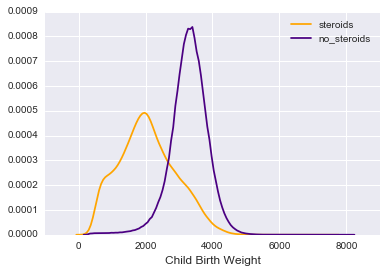

In [138]:
steroids  = data_wt['dbwt'][data_wt['ld_ster']=='Y']
no_steroids = data_wt['dbwt'][data_wt['ld_ster']=='N']
sns.distplot(steroids, bins= 15, color = 'orange',hist=False, label= 'steroids')
sns.distplot(no_steroids, bins = 15, color = 'indigo', hist=False, label= 'no_steroids')
plt.xlabel('Child Birth Weight', fontsize=12)


# hepatitisB  = data_wt['dbwt'][data_wt['ip_hepatb']=='Y']
# no_hepatitisB = data_wt['dbwt'][data_wt['ip_hepatb']=='N']
# sns.distplot(hepatitisB, bins= 15, color = 'orange',hist=False, label= 'hepatitisB')
# sns.distplot(no_hepatitisB, bins = 15, color = 'indigo', hist=False, label= 'no_hepatitisB')
# plt.xlabel('Child Birth Weight', fontsize=12)

## Effect of gender of child

In [139]:
grouped = data.groupby( "sex")
curb_weight = grouped[ "dbwt"].describe()
curb_weight = curb_weight.unstack( level=-1)
print curb_weight

         count         mean         std    min     25%     50%     75%     max
sex                                                                           
F    1947247.0  3217.069257  607.764834  227.0  2920.0  3255.0  3572.0  9999.0
M    2041486.0  3332.776039  636.897347  227.0  3030.0  3374.0  3700.0  9999.0


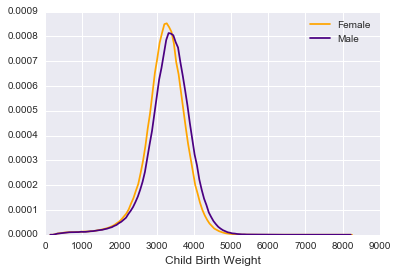

In [140]:
Female  = data_wt['dbwt'][data_wt['sex']=='F']
Male = data_wt['dbwt'][data_wt['sex']=='M']
sns.distplot(Female, bins= 15, color = 'orange',hist=False, label= 'Female')
sns.distplot(Male, bins = 15, color = 'indigo', hist=False, label= 'Male')
plt.xlabel('Child Birth Weight', fontsize=12)

## Impact of Mother's Age, race and education

# Graph#6 : What is the impact of mother's age child's birth weight
### Mothers with age between 30-34 have highest mean birth weight

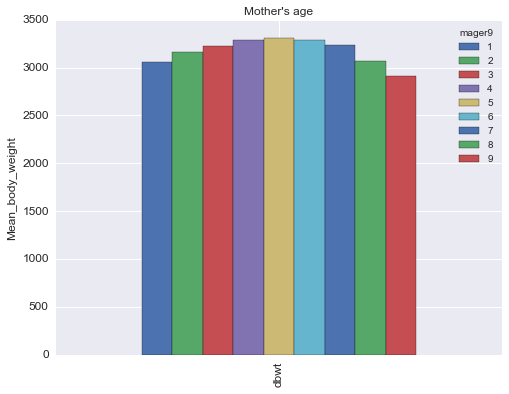

In [141]:
df1 = data_wt[['mager9','dbwt']]
grp_mean=df1.groupby('mager9').mean()
grp_mean_transpose = grp_mean.transpose()
grp_mean_transpose.head()
import matplotlib.pyplot as plt
ax = grp_mean_transpose.plot(kind='bar', title ="Mother's age", figsize=(8, 6), width = .8,legend=True, fontsize=12)
ax.set_ylabel("Mean_body_weight", fontsize=12)
plt.show()

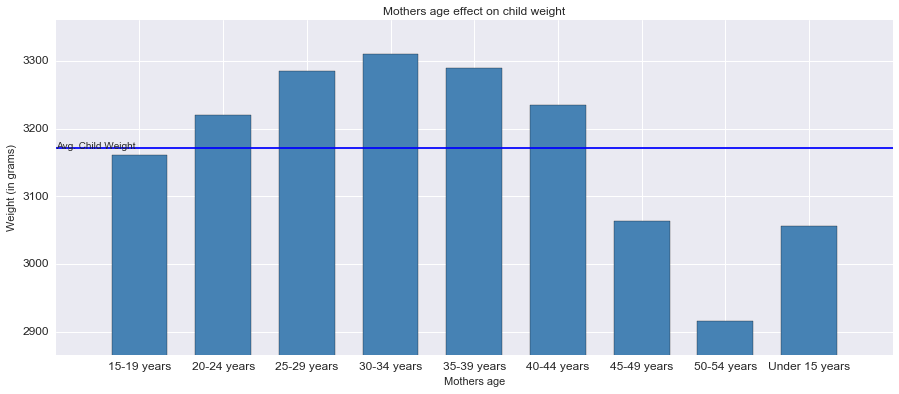

In [153]:
grp_mean = {"Under 15 years":3056.95, "15-19 years":3161.61, "20-24 years":3220.65, "25-29 years":3285.73, 
            "30-34 years": 3310.98, "35-39 years":3290.48, "40-44 years":3234.58,"45-49 years":3063.79,"50-54 years":2915.85}

xs=[]
ys=[]
x=range(len(grp_mean))
for key,value in sorted(grp_mean.iteritems()): 
  xs.append(key)    
  ys.append(value)
    
mean_wt= np.mean(ys)

width = 1/1.5
figure = plt.figure(figsize=(15, 6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(x, ys, width, color="steelblue", align="center")
axes.set_xticks([i for i in xrange(0, len(grp_mean))])
axes.set_xticklabels(xs)
plt.tick_params(which='major', labelsize=12 )
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((min(ys)-50, max(ys)+50))
axes.axhline(y=mean_wt, xmin=0, label="Avg. Child Weight")
plt.text(x=-1, y=mean_wt, s="Avg. Child Weight")
axes.set_title('Mothers age effect on child weight')

axes.set_xlabel('Mothers age')
axes.set_ylabel('Weight (in grams)')
plt.show()

### Effect of mother's race

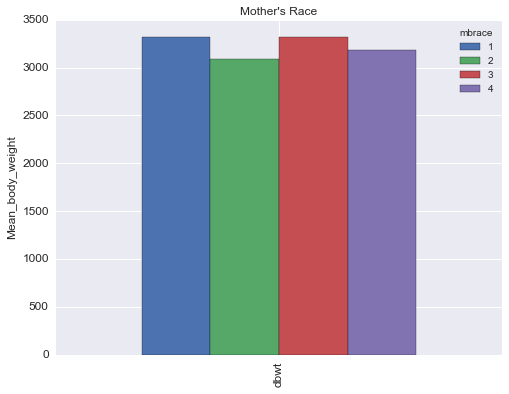

In [143]:
df1 = data_wt[['mbrace','dbwt']]
grp_mean=df1.groupby('mbrace').mean()
grp_mean_transpose = grp_mean.transpose()
grp_mean_transpose.head()
import matplotlib.pyplot as plt
ax = grp_mean_transpose.plot(kind='bar', title ="Mother's Race", figsize=(8, 6), width = .8,legend=True, fontsize=12)
ax.set_ylabel("Mean_body_weight", fontsize=12)
plt.show()

### American Indian/Alaska Native have higher child birth weight, but lower birth & fertility weight

In [144]:
df = data2_2012[['Race','Birth Rate','Fertility Rate']]

df.head()

,Race,Birth Rate,Fertility Rate
32,Asian/Pacific Islander,15.1,62.2
87,American Indian/Alaska Native,10.5,47.0
140,White,12.1,63.0
195,Black,14.7,65.1


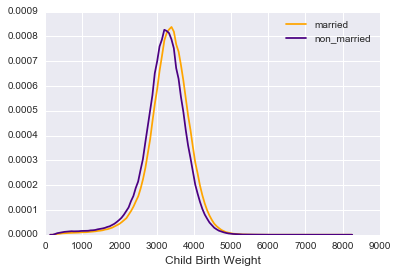

In [145]:
married  = data_wt['dbwt'][data_wt['dmar']==1]
non_married = data_wt['dbwt'][data_wt['dmar']==2]
sns.distplot(married, bins= 15, color = 'orange',hist=False, label= 'married')
sns.distplot(non_married, bins = 15, color = 'indigo', hist=False, label= 'non_married')
plt.xlabel('Child Birth Weight', fontsize=12)

### Impact of mother's education

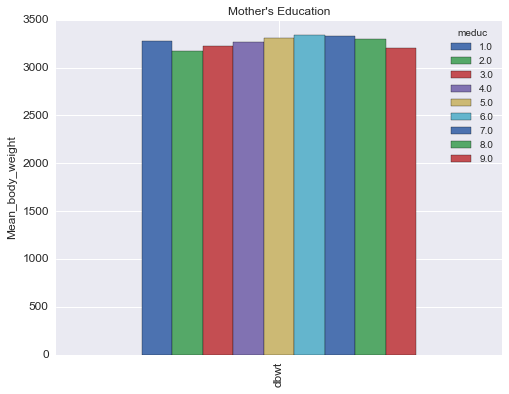

In [146]:
df1 = data_wt[['meduc','dbwt']]
grp_mean=df1.groupby('meduc').mean()
grp_mean_transpose = grp_mean.transpose()
grp_mean_transpose.head()
import matplotlib.pyplot as plt
ax = grp_mean_transpose.plot(kind='bar', title ="Mother's Education", figsize=(8, 6), width = .8,legend=True, fontsize=12)
ax.set_ylabel("Mean_body_weight", fontsize=12)
plt.show()

## Impact of Father's Race
#### Again White & American Indian or Alaskan Native father have higher mean child birth weight

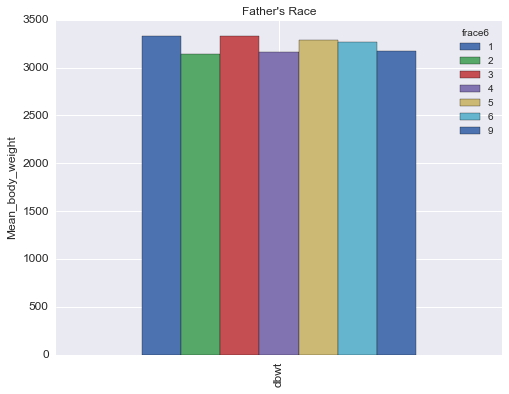

In [147]:
df1 = data_wt[['frace6','dbwt']]
grp_mean=df1.groupby('frace6').mean()
grp_mean_transpose = grp_mean.transpose()
grp_mean_transpose.head()
import matplotlib.pyplot as plt
ax = grp_mean_transpose.plot(kind='bar', title ="Father's Race", figsize=(8, 6), width = .8,legend=True, fontsize=12)
ax.set_ylabel("Mean_body_weight", fontsize=12)
plt.show()

## Interval since last pregnancy
#### Time period-4 i.e. 24-35 month since last pregnancy have maximum mean weight

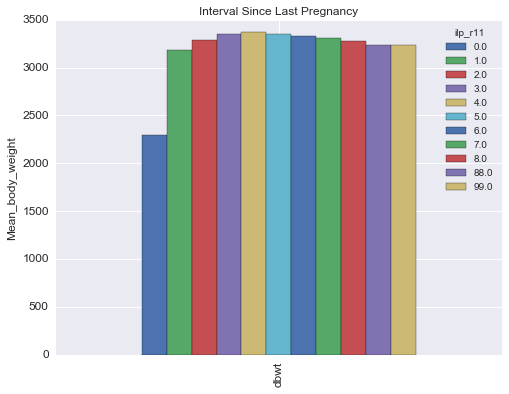

In [148]:
df1 = data_wt[['ilp_r11','dbwt']]
grp_mean=df1.groupby('ilp_r11').mean()
grp_mean_transpose = grp_mean.transpose()
grp_mean_transpose.head()
import matplotlib.pyplot as plt
ax = grp_mean_transpose.plot(kind='bar', title ="Interval Since Last Pregnancy", figsize=(8, 6), width = .8,legend=True, fontsize=12)
ax.set_ylabel("Mean_body_weight", fontsize=12)
plt.show()


# Graph#7: How Important is birth-weights related to baby's health?

## 5 minute Apgar Score can give some insights !
### Higher the Apgar score, healthier the baby is and as suggested in bar plot below the Apgar score of 10 has max mean child birth weight

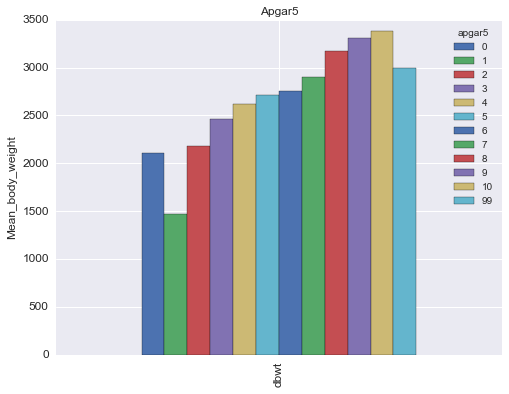

In [149]:
df1 = data_wt[['apgar5','dbwt']]
grp_mean=df1.groupby('apgar5').mean()
grp_mean_transpose = grp_mean.transpose()
grp_mean_transpose.head()

import matplotlib.pyplot as plt
ax = grp_mean_transpose.plot(kind='bar', title ="Apgar5", figsize=(8, 6), width = .8,legend=True, fontsize=12)
ax.set_ylabel("Mean_body_weight", fontsize=12)
plt.show()


In [150]:
grp_mean

,dbwt
apgar5,
0,2111.567211
1,1464.312621
2,2179.020940
3,2461.883329
4,2615.550868
5,2717.403489
6,2759.838639
7,2906.630071
8,3171.262813


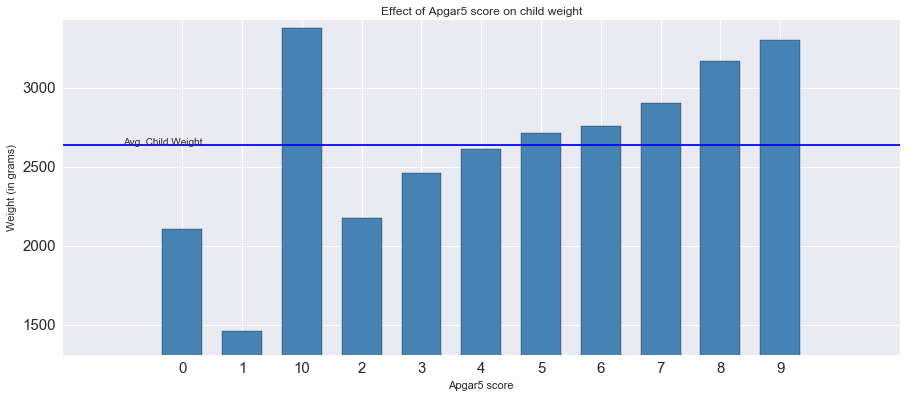

In [155]:
grp_mean = {"0":2111.56, "1":1464.31, "2":2179.02, "3":2461.88, 
            "4": 2615.55, "5":2717.40, "6":2759.83,"7":2906.63,"8":3171.26,"9" :3306.95,"10":3382.51}

xs=[]
ys=[]
x=range(len(grp_mean))
for key,value in sorted(grp_mean.iteritems()): 
  xs.append(key)    
  ys.append(value)
    
mean_wt= np.mean(ys)

width = 1/1.5
figure = plt.figure(figsize=(15, 6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(x, ys, width, color="steelblue", align="center")
axes.set_xticks([i for i in xrange(0, len(grp_mean))])
axes.set_xticklabels(xs)
plt.tick_params(which='major', labelsize=15)
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((min(ys)-150, max(ys)+50))
axes.axhline(y=mean_wt, xmin=0, label="Avg. Child Weight")
plt.text(x=-1, y=mean_wt, s="Avg. Child Weight")
axes.set_title('Effect of Apgar5 score on child weight')

axes.set_xlabel('Apgar5 score')
axes.set_ylabel('Weight (in grams)')
plt.show()